In [1]:
import bestReductionClass as br
from matrixGenerator import matrixGenerator
import numpy as np
from time import time

In [5]:
#In every iteration, we generate a random matrix M and reduce along each row.
#For each row of M, we create a row of our training matrix X. Since our matrices have four rows, 
#each iteration will produce four rows in X.

#Each row of the training matrix has four elements:
# 1) The flattened matrix M stored as a numpy array
# 2) The row we're reducing along (i.e. 0, 1, 2, or 3)
# 3) The original area of M
# 4) The new area of reduction of M

#ADJUST THIS #########################################################################################
numIterations = 4
######################################################################################################


variance1 = 4
variance2 = 1
matrixSize = 4

X = []
start = time()
print("Constructing Test Set...")
for i in range(numIterations):
    M = matrixGenerator(matrixSize, variance1, variance2)
    G1 = br.bestReductionClass(M)
    areas = G1.getAreas()
    for row in range(matrixSize):
        temp = np.array([M.flatten(), row, areas[0], areas[row + 1]])
        X.append(temp)
    if ((i + 1) % 500 == 0):
        print("Completed " + str(i + 1) + " iterations out of " + str(numIterations) +'.')
X = np.array(X)
np.save("TrainingSet.npy", X)
finish = time()
print("Finished")
print("It took " + str(finish - start) + " seconds to complete " + str(numIterations) + " iterations.")

Constructing Test Set
Completed 2 iterations out of 3.
Finished
It took 20.997246026992798 seconds to complete 3 iterations.


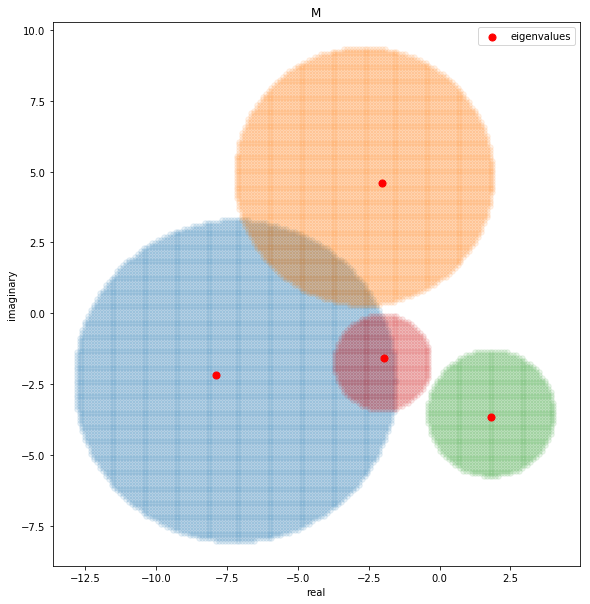

Orininal Area of M: 194.8338


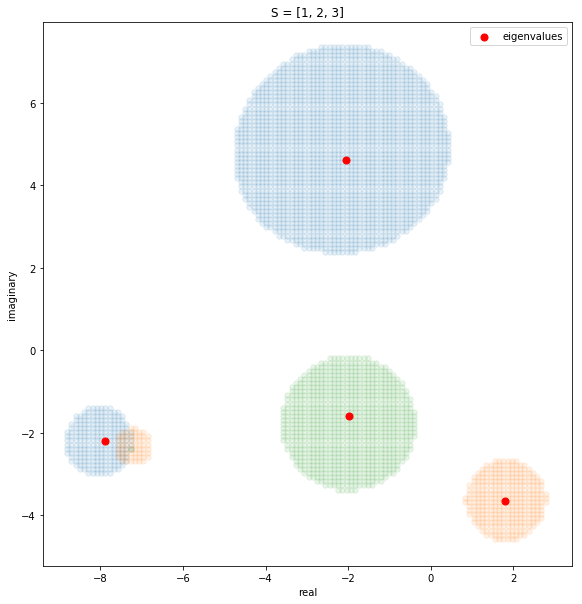

New area of M reduced along row 0: 37.7937


In [15]:
#Playing with the resulting test set
import GershgorwinClass as gr
X1 = np.load("TrainingSet.npy")
M = X1[4][0].reshape((4,4))
GG = gr.Gershgorwin(M, [1, 2, 3])
GG.plotGRegions(GG.M)
print("Orininal Area of M: " + str(X1[4][2]))
GG.plotGRegions(GG.RSM)
print("New area of M reduced along row " + str(X1[4][1]) + ": " + str(X1[4][3]))